In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img_width, img_height = 128, 128 

In [14]:
model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
    
for layer in model.layers[:5]:
    layer.trainable = False
    
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(units = 6, activation='softmax')(x) 
    model =tf.keras.models.Model(inputs = model.input, outputs = predictions)
    model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])



In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                horizontal_flip = True)

In [16]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('Mosquito_Images/Training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 5,
                                                 class_mode = 'binary')

Found 2861 images belonging to 6 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Mosquito_Images/Test_set',
                                           target_size = (128, 128),
                                            batch_size = 5,
                                            class_mode = 'binary')

Found 717 images belonging to 6 classes.


In [20]:
model.fit_generator(training_set,
                    steps_per_epoch = 100,
                    epochs = 50,
                    verbose=1,
                    validation_data = test_set,
                    validation_steps = 218)

Epoch 1/50


ValueError: Error when checking input: expected input_3 to have shape (128, 128, 3) but got array with shape (64, 64, 3)

In [21]:
df['Spray_status']=df['Spray_status'].astype(str)
df['Position']=df['Position'].astype(str)
df['Collection_method']=df['Collection_method'].astype(str)
df['Spray_date']= pd.to_datetime(df['Spray_date'])
df['Collection_time']=df['Collection_time'].astype(str)

In [22]:
df.isnull().sum()

Country                      0
Province                     0
District                     0
Collection_site              0
Year                         0
Month                        0
Households                   0
No_of_occupants              0
Spray_status                 0
Spray_date                 690
Collection_method            0
Position                     0
Collection_time              0
An_gambiae_sl                0
An_funestus_sl               0
An_coustani                  0
An_pretoriensis              0
An_rufipes                   0
An_natalensis                0
An_maculipalpis              0
An_tenebrosus                0
An_rhodesiensis              0
An_squamosus                 0
An_theileri                  0
An_ardensis                  0
An_obscurus                  0
Other                        0
Malaria__vector_present      0
dtype: int64

In [23]:
for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print("The number of values for feature {} is: {}--{}".format(column,nr_values,unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column,nr_values))

The number of values for feature Country is: 1--['Zimbabwe']
The number of values for feature Province is: 9--[0 1 2 3 4 5 6 7 8]
The number of values for feature District is: 24
The number of values for feature Collection_site is: 33
The number of values for feature Year is: 6--[2015 2016 2017 2018 2019 2020]
The number of values for feature Month is: 12
The number of values for feature Households is: 66
The number of values for feature No_of_occupants is: 90
The number of values for feature Spray_status is: 3--['0' '1' '2']
The number of values for feature Spray_date is: 725
The number of values for feature Collection_method is: 5--['0' '1' '2' '3' '4']
The number of values for feature Position is: 3--['0' '1' '2']
The number of values for feature Collection_time is: 14
The number of values for feature An_gambiae_sl is: 39
The number of values for feature An_funestus_sl is: 55
The number of values for feature An_coustani is: 14
The number of values for feature An_pretoriensis is: 27


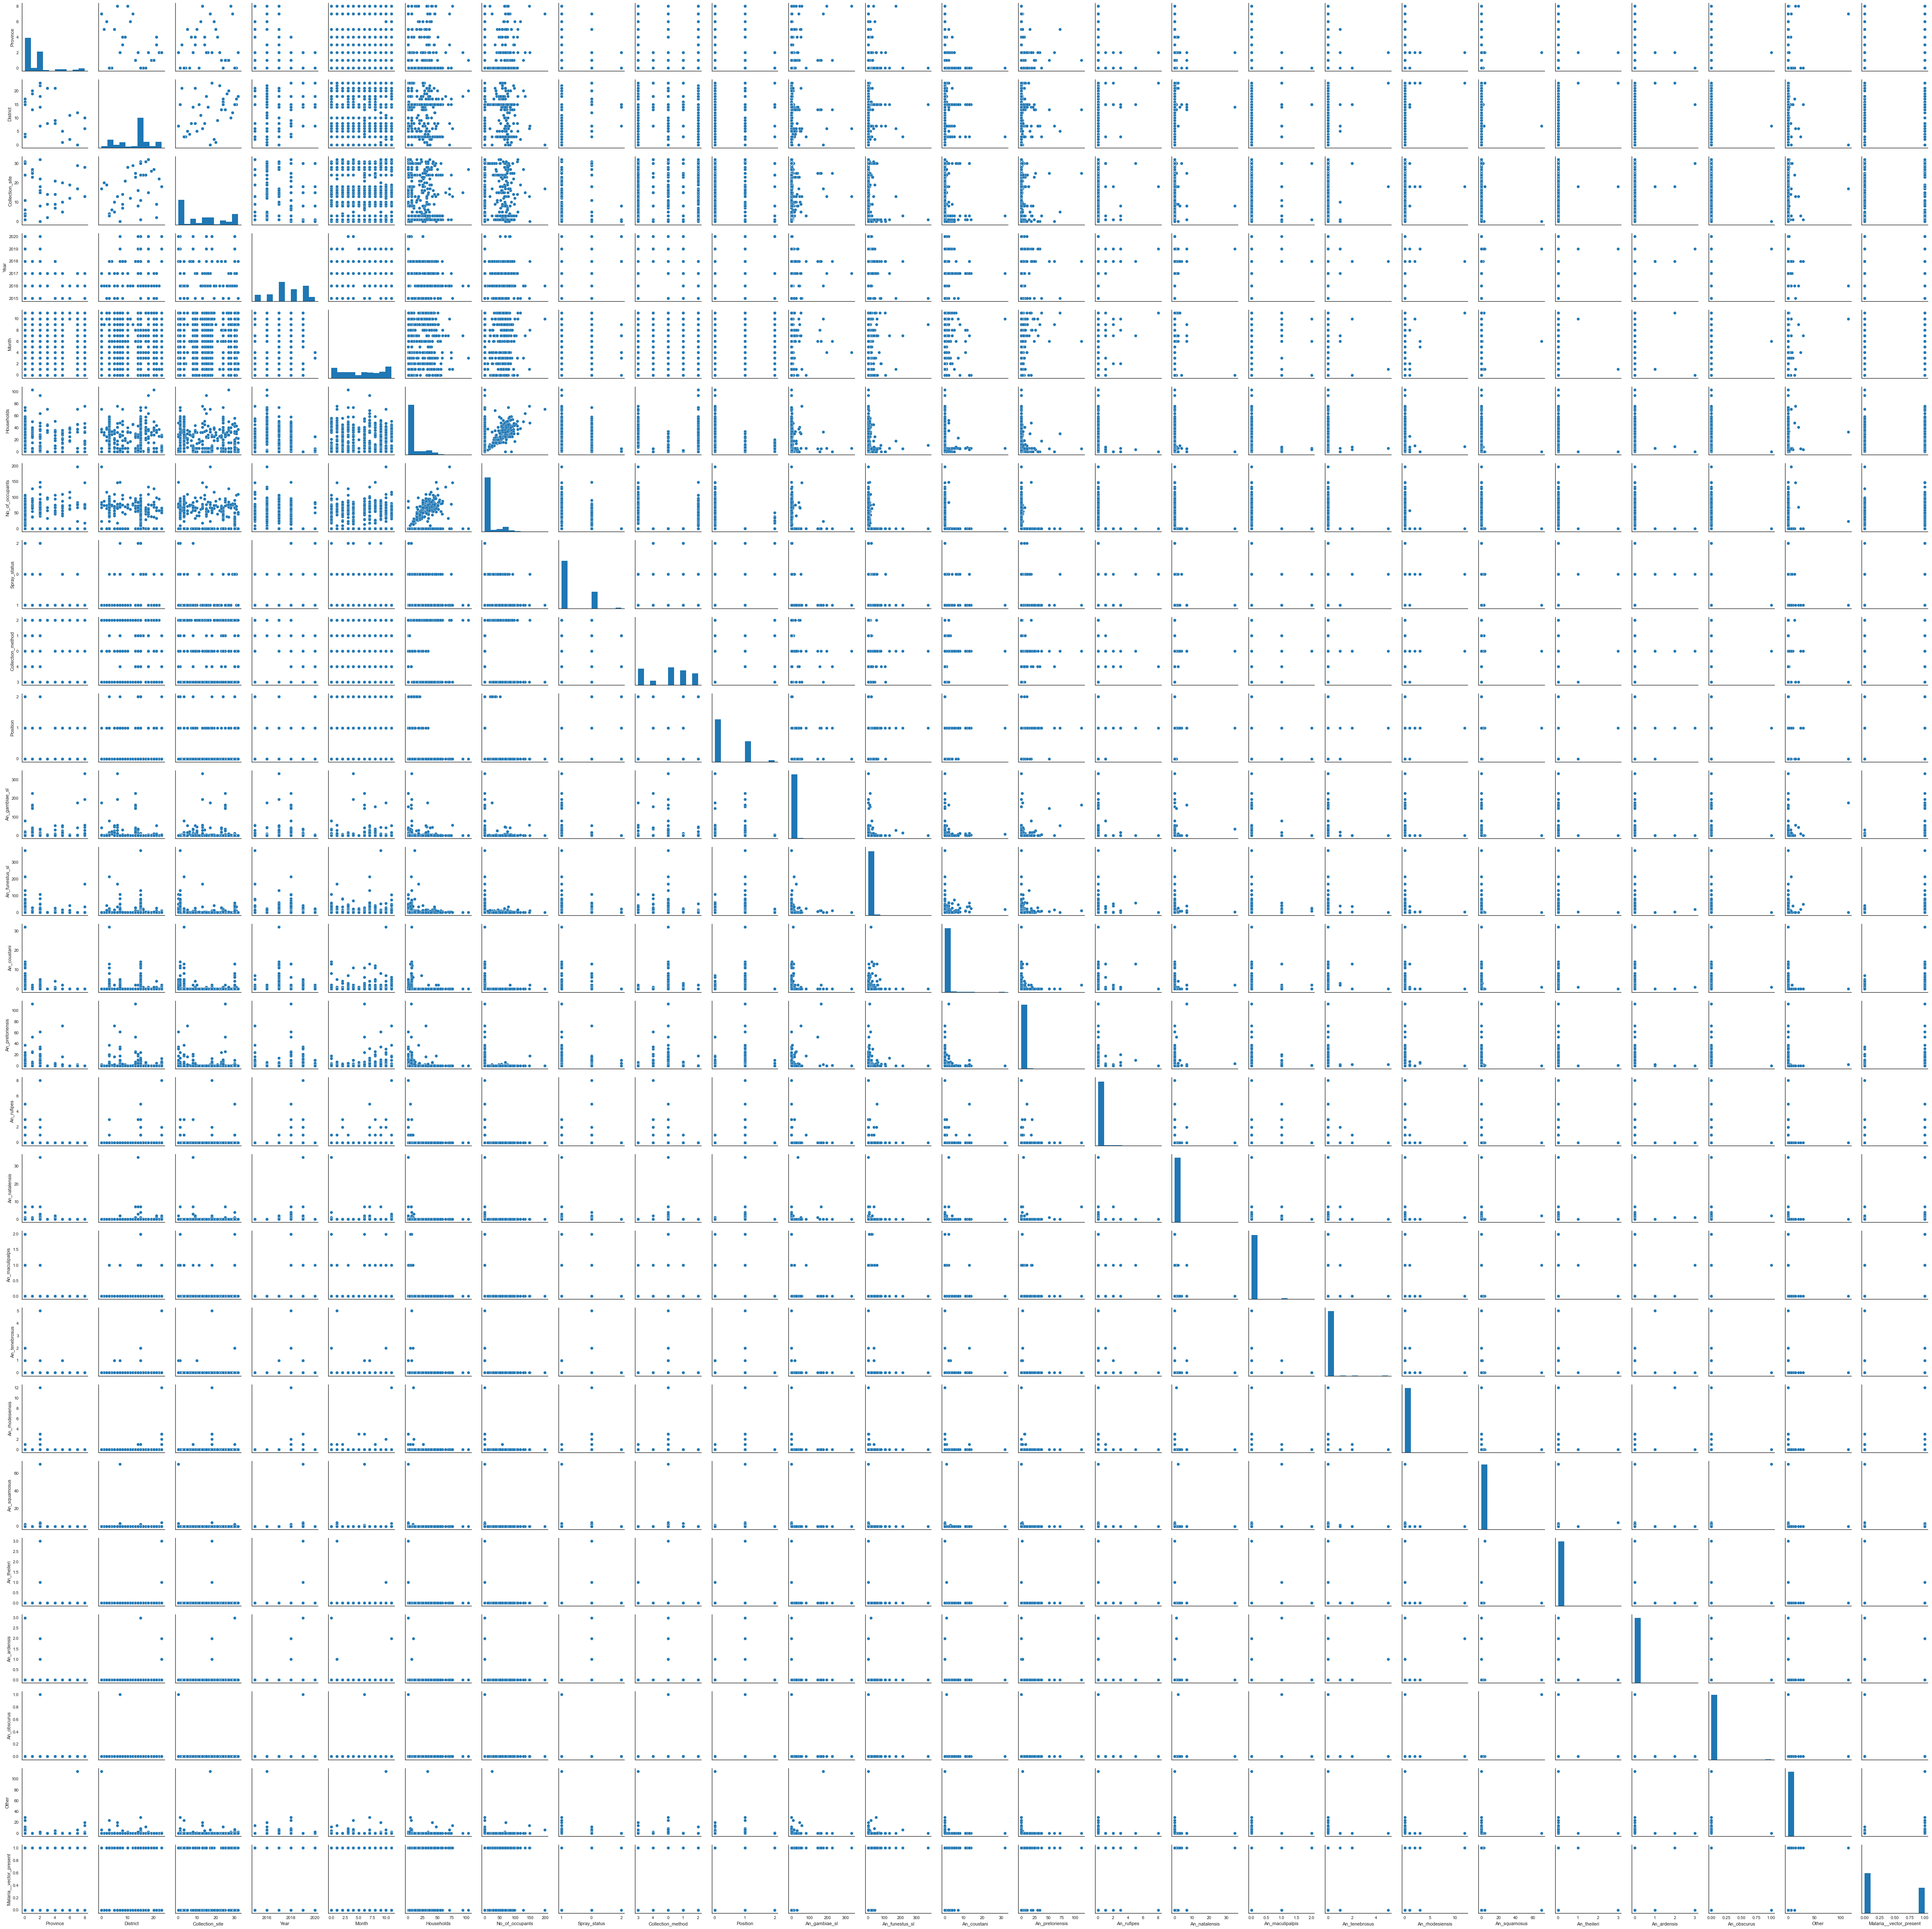

In [24]:
g = sns.pairplot(df)

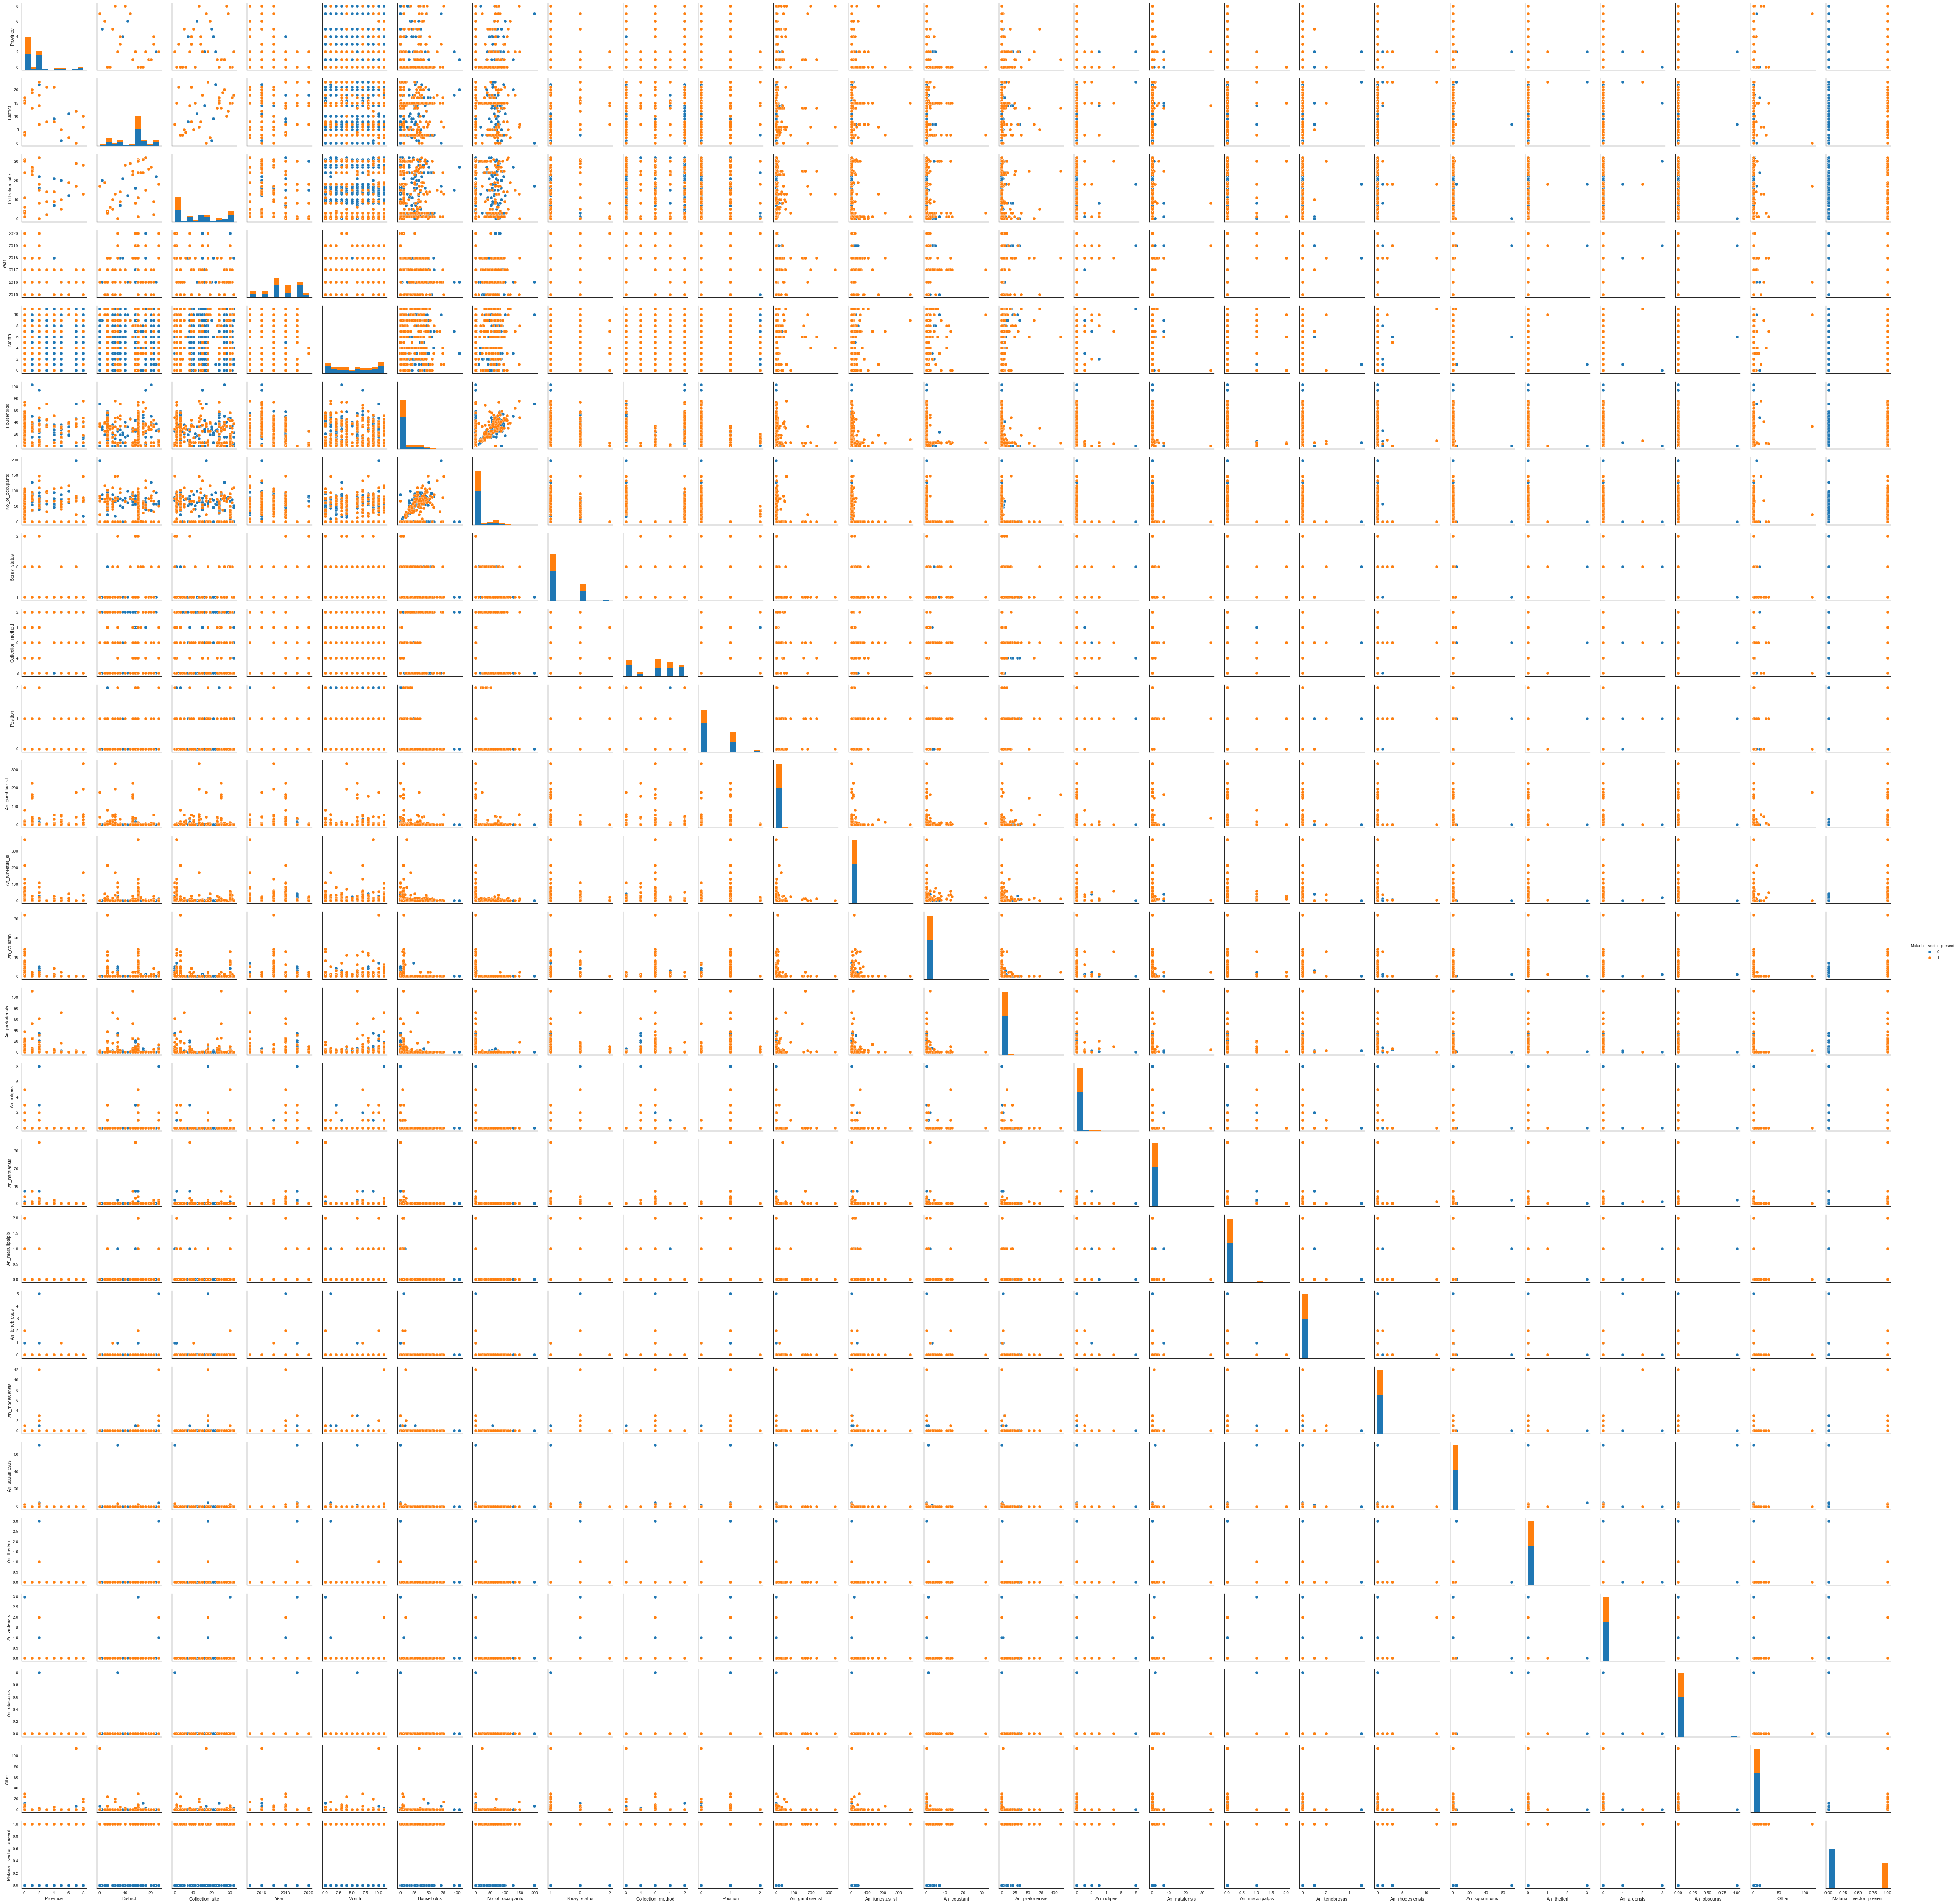

In [25]:
g = sns.pairplot(df,hue= 'Malaria__vector_present')

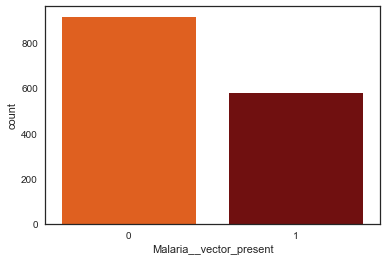

In [29]:
ax=sns.countplot(x='Malaria__vector_present',data=df,palette='gist_heat_r')

In [ ]:
df.dtypes

In [12]:
df[['Households','No_of_occupants','An_pretoriensis','An_rufipes','An_natalensis','An_maculipalpis','An_tenebrosus',                   
'An_rhodesiensis','An_squamosus','An_theileri']]=df[['Households','No_of_occupants','An_pretoriensis','An_rufipes','An_natalensis','An_maculipalpis','An_tenebrosus',                   
'An_rhodesiensis','An_squamosus','An_theileri']].fillna(0).astype('int64')

In [13]:
df.dtypes

Country                    object
Province                   object
District                   object
Collection_site            object
Year                        int64
Month                      object
Households                  int64
No_of_occupants             int64
Spray_status               object
Spray_date                 object
Collection_method          object
Position                   object
Collection_time            object
An_gambiae_sl               int64
An_funestus_sl              int64
An_coustani                 int64
An_pretoriensis             int64
An_rufipes                  int64
An_natalensis               int64
An_maculipalpis             int64
An_tenebrosus               int64
An_rhodesiensis             int64
An_squamosus                int64
An_theileri                 int64
An_ardensis                 int64
An_obscurus                 int64
Other                       int64
Malaria__vector_present    object
dtype: object

In [14]:
df.head()             

,Country,Province,District,Collection_site,Year,Month,Households,No_of_occupants,Spray_status,Spray_date,...,An_natalensis,An_maculipalpis,An_tenebrosus,An_rhodesiensis,An_squamosus,An_theileri,An_ardensis,An_obscurus,Other,Malaria__vector_present
0,Zimbabwe,Mashonaland East,Mutoko,Kawere,2019,March,0,0,Sprayed,NaN,...,0,0,0,0,0,0,0,0,0,No
1,Zimbabwe,Mashonaland East,Mutoko,Kawere,2019,April,0,0,Sprayed,NaN,...,0,0,0,0,0,0,0,0,0,No
2,Zimbabwe,Mashonaland East,Mutoko,Kawere,2019,May,0,0,Sprayed,NaN,...,0,0,0,0,0,0,0,0,0,No
3,Zimbabwe,Mashonaland East,Mutoko,Kawere,2019,June,0,0,Sprayed,NaN,...,0,0,0,0,0,0,0,0,0,No
4,Zimbabwe,Mashonaland East,Mutoko,Kawere,2019,July,0,0,Sprayed,NaN,...,0,0,0,0,0,0,0,0,0,No


In [15]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
df['Malaria__vector_present'] = lb.fit_transform(df['Malaria__vector_present'])
df['Month'] = lb.fit_transform(df['Month'])
df['Province'] = lb.fit_transform(df['Province'])
df['District'] = lb.fit_transform(df['District'])
df['Collection_site'] = lb.fit_transform(df['Collection_site'])
df['Spray_status'] = lb.fit_transform(df['Spray_status'])
df['Collection_method'] = lb.fit_transform(df['Collection_method'])
df['Position'] = lb.fit_transform(df['Position'])

In [16]:
df.head(5)

,Country,Province,District,Collection_site,Year,Month,Households,No_of_occupants,Spray_status,Spray_date,...,An_natalensis,An_maculipalpis,An_tenebrosus,An_rhodesiensis,An_squamosus,An_theileri,An_ardensis,An_obscurus,Other,Malaria__vector_present
0,Zimbabwe,2,18,15,2019,7,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Zimbabwe,2,18,15,2019,0,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Zimbabwe,2,18,15,2019,8,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Zimbabwe,2,18,15,2019,6,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Zimbabwe,2,18,15,2019,5,0,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.tail(5)

,Country,Province,District,Collection_site,Year,Month,Households,No_of_occupants,Spray_status,Spray_date,...,An_natalensis,An_maculipalpis,An_tenebrosus,An_rhodesiensis,An_squamosus,An_theileri,An_ardensis,An_obscurus,Other,Malaria__vector_present
1491,Zimbabwe,2,23,18,2020,4,2,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1492,Zimbabwe,2,23,18,2020,4,2,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1493,Zimbabwe,2,7,0,2020,4,2,0,1,10/16/2019,...,0,0,0,0,0,0,0,0,0,1
1494,Zimbabwe,2,23,18,2020,4,2,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1495,Zimbabwe,2,14,8,2020,3,2,0,1,11/16/2019,...,0,0,0,0,0,0,0,0,2,1


In [ ]:
#select features
feature_cols = ['Province','District','Collection_site','Year','Month','Households','No_of_occupants',
'Spray_status','Collection_method','Position','An_gambiae_sl','An_funestus_sl','An_coustani','An_pretoriensis','An_rufipes','An_natalensis','An_maculipalpis',         
'An_tenebrosus','An_rhodesiensis','An_squamosus','An_theileri','An_ardensis','An_obscurus','Other']
X = df[feature_cols] # Features
y = df.Malaria__vector_present #Target variable

In [ ]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression

In [ ]:
#instantiate the model 
logreg = LogisticRegression()

In [ ]:
#fit the model with data
logreg.fit(X_train,y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5,257.44,'Predicted label')

In [ ]:
print("Accuracy:" ,metrics.accuracy_score(y_test,y_pred))
print("Precision:" ,metrics.precision_score(y_test,y_pred))
print("Recall:" ,metrics.recall_score(y_test,y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label = "data 1,auc = " +str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
cnf_matrix1 = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix1

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#heat map
sns.heatmap(pd.DataFrame(cnf_matrix1),annot=True,cmap="RdYlGn",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
y_pred_proba1 = logreg.predict_proba(X_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label = "data 1,auc = " +str(auc1))
plt.legend(loc=4)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
from keras.preprocessing import image
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2),strides=(2, 2), padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units = 200, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 150, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                horizontal_flip = True)

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('Mosquito_Images/Training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 5,
                                                 class_mode = 'binary')

In [ ]:
test_set = test_datagen.flow_from_directory('Mosquito_Images/Test_set',
                                           target_size = (64, 64),
                                            batch_size = 5,
                                            class_mode = 'binary')

In [ ]:
model.fit_generator(training_set,
                    steps_per_epoch = 100,
                    epochs = 2,
                    verbose=1,
                    validation_data = test_set,
                    validation_steps = 218)

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='tb_logs', 
                                             histogram_freq=1,
                                             write_graph=True, 
                                             write_images=True)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/data/model.h5")
print("Saved model to disk")

In [ ]:
test_image = tf.keras.preprocessing.image.load_img('Mosquito_Images/Single_prediction/.jpg', target_size = (64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result =model.predict(test_image)

if result[0][0] == 2:
    prediction = ''
else:
    prediction = ''